<a href="https://colab.research.google.com/github/faysalislam/12misha/blob/master/tlk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
mobile = keras.applications.mobilenet.MobileNet()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 1s 0us/step


In [0]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

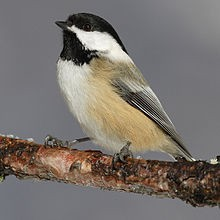

In [0]:
Image(filename='1_hYFLVztlCuZgK1pd3cKofw.jpeg')

In [0]:
ls

1_hYFLVztlCuZgK1pd3cKofw.jpeg  sample_data/


In [0]:
preprocessed_image = prepare_image('1_hYFLVztlCuZgK1pd3cKofw.jpeg')

In [0]:
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n01592084', 'chickadee', 0.9979674),
  ('n01530575', 'brambling', 0.00090178056),
  ('n01601694', 'water_ouzel', 0.00035124228),
  ('n01560419', 'bulbul', 0.0002842597),
  ('n01824575', 'coucal', 0.0002064648)]]

In [0]:
!pip3 install google_images_download

In [0]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"blue tit","limit":100,"print_urls":False,"format":"jpg", "size":">400*300"}
paths = response.download(arguments)
arguments = {"keywords":"crow","limit":100,"print_urls":False, "format":"jpg", "size":">400*300"}
paths = response.download(arguments)


Item no.: 1 --> Item name = blue tit
Evaluating...
Starting Download...
Completed Image ====> 1.Eurasian_blue_tit_Lancashire.jpg
Completed Image ====> 2.21-facts-on-blue-tit-i1.jpg
Completed Image ====> 3.blue-tit_adult_1200x675.jpg
Completed Image ====> 4.Bluetit%20%C2%A9%20Dave%20Kilbey.jpg
Wrong image format returned. Skipping...
Completed Image ====> 5.blue_tit.jpg
Completed Image ====> 6.2019-02-13_wex_47937837_I1.JPG
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
Completed Image ====> 7.Blue-tit-in-the-rain.jpg
Completed Image ====> 8.tit-909894.jpg
Completed Image ====> 9.bluetit768.jpg
Completed Image ====> 10.blue-tit.jpg
Completed Image ====> 11.Blue_tit_looking_smart-min_1.jpg
Completed Image ====> 12.blue_tit_1.jpg
Completed Image ====> 13.blue-tit-wtml-louis-cardin.jpg
Completed Image ====> 14.blue-tit_juvenile_1200x675.jpg
Wrong image format returned. Skipping...
Completed Image ===

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
train_generator=train_datagen.flow_from_directory('downloads',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 179 images belonging to 2 classes.


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 1.0460 - acc: 0.6754
Epoch 2/10
5/5 [==============================] - 4s 751ms/step - loss: 0.0667 - acc: 0.9750
Epoch 3/10
5/5 [==============================] - 3s 671ms/step - loss: 0.0033 - acc: 1.0000
Epoch 4/10
5/5 [==============================] - 4s 728ms/step - loss: 1.6834e-04 - acc: 1.0000
Epoch 5/10
5/5 [==============================] - 4s 747ms/step - loss: 0.0072 - acc: 0.9937
Epoch 6/10
5/5 [==============================] - 4s 810ms/step - loss: 5.5763e-04 - acc: 1.0000
Epoch 7/10
5/5 [==============================] - 4s 846ms/step - loss: 2.3337e-05 - acc: 1.0000
Epoch 8/10
5/5 [==============================] - 3s 692ms/step - loss: 4.2381e-06 - acc: 1.0000
Epoch 9/10
5/5 [==============================] - 4s 777ms/step - loss: 3.5621e-06 - acc: 1.0000
Epoch 10/10
5/5 [==============================] - 4

In [0]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [0]:
img_path = '1_hYFLVztlCuZgK1pd3cKofw.jpeg'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[1.0000000e+00, 3.6195013e-20]], dtype=float32)

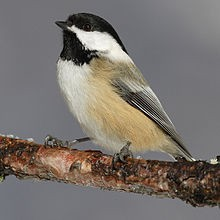

In [0]:
Image(filename='1_hYFLVztlCuZgK1pd3cKofw.jpeg')

In [0]:
preprocessed_image = prepare_image('1_hYFLVztlCuZgK1pd3cKofw.jpeg')

In [0]:
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01592084', 'chickadee', 0.9979674),
  ('n01530575', 'brambling', 0.00090178056),
  ('n01601694', 'water_ouzel', 0.00035124228),
  ('n01560419', 'bulbul', 0.0002842597),
  ('n01824575', 'coucal', 0.0002064648)]]